#Step 1: importing data from the kaggle

In [ ]:
!pip install kaggle
!kaggle datasets download -d nancyalaswad90/breast-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset
License(s): CC0-1.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 2.35MB/s]


# Step 2: Unzipping the data

In [ ]:
!unzip /content/breast-cancer-dataset.zip

Archive:  /content/breast-cancer-dataset.zip
  inflating: data.csv                


# Step 3: Importing the necessary libraries

In [ ]:
# Pandas for loading and manipulating data
import pandas as pd
# NumPy for numerical operations
import numpy as np
# Seaborn for advanced statistical visualizations
import seaborn as sns
# Matplotlib for general plotting and customization
import matplotlib.pyplot as plt
# Missingno for visualizing missing data
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Plot styles to set aesthetic preferences for your visualizations.
sns.set()
plt.style.use('ggplot')

# Step 4: Loading data into python frames and showing first few rows of the dataset

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Step 5: Understanding the data

In [ ]:
# checking what is in diagnosis column (target column)
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
#  checking the data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# checking for the missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [ ]:
# summary of mean, standard deviation and percentile
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# viewing the shape of the data for checking the number of rows and columns
df.shape

(569, 32)

# Step 6: Visualizing the data

<Axes: >

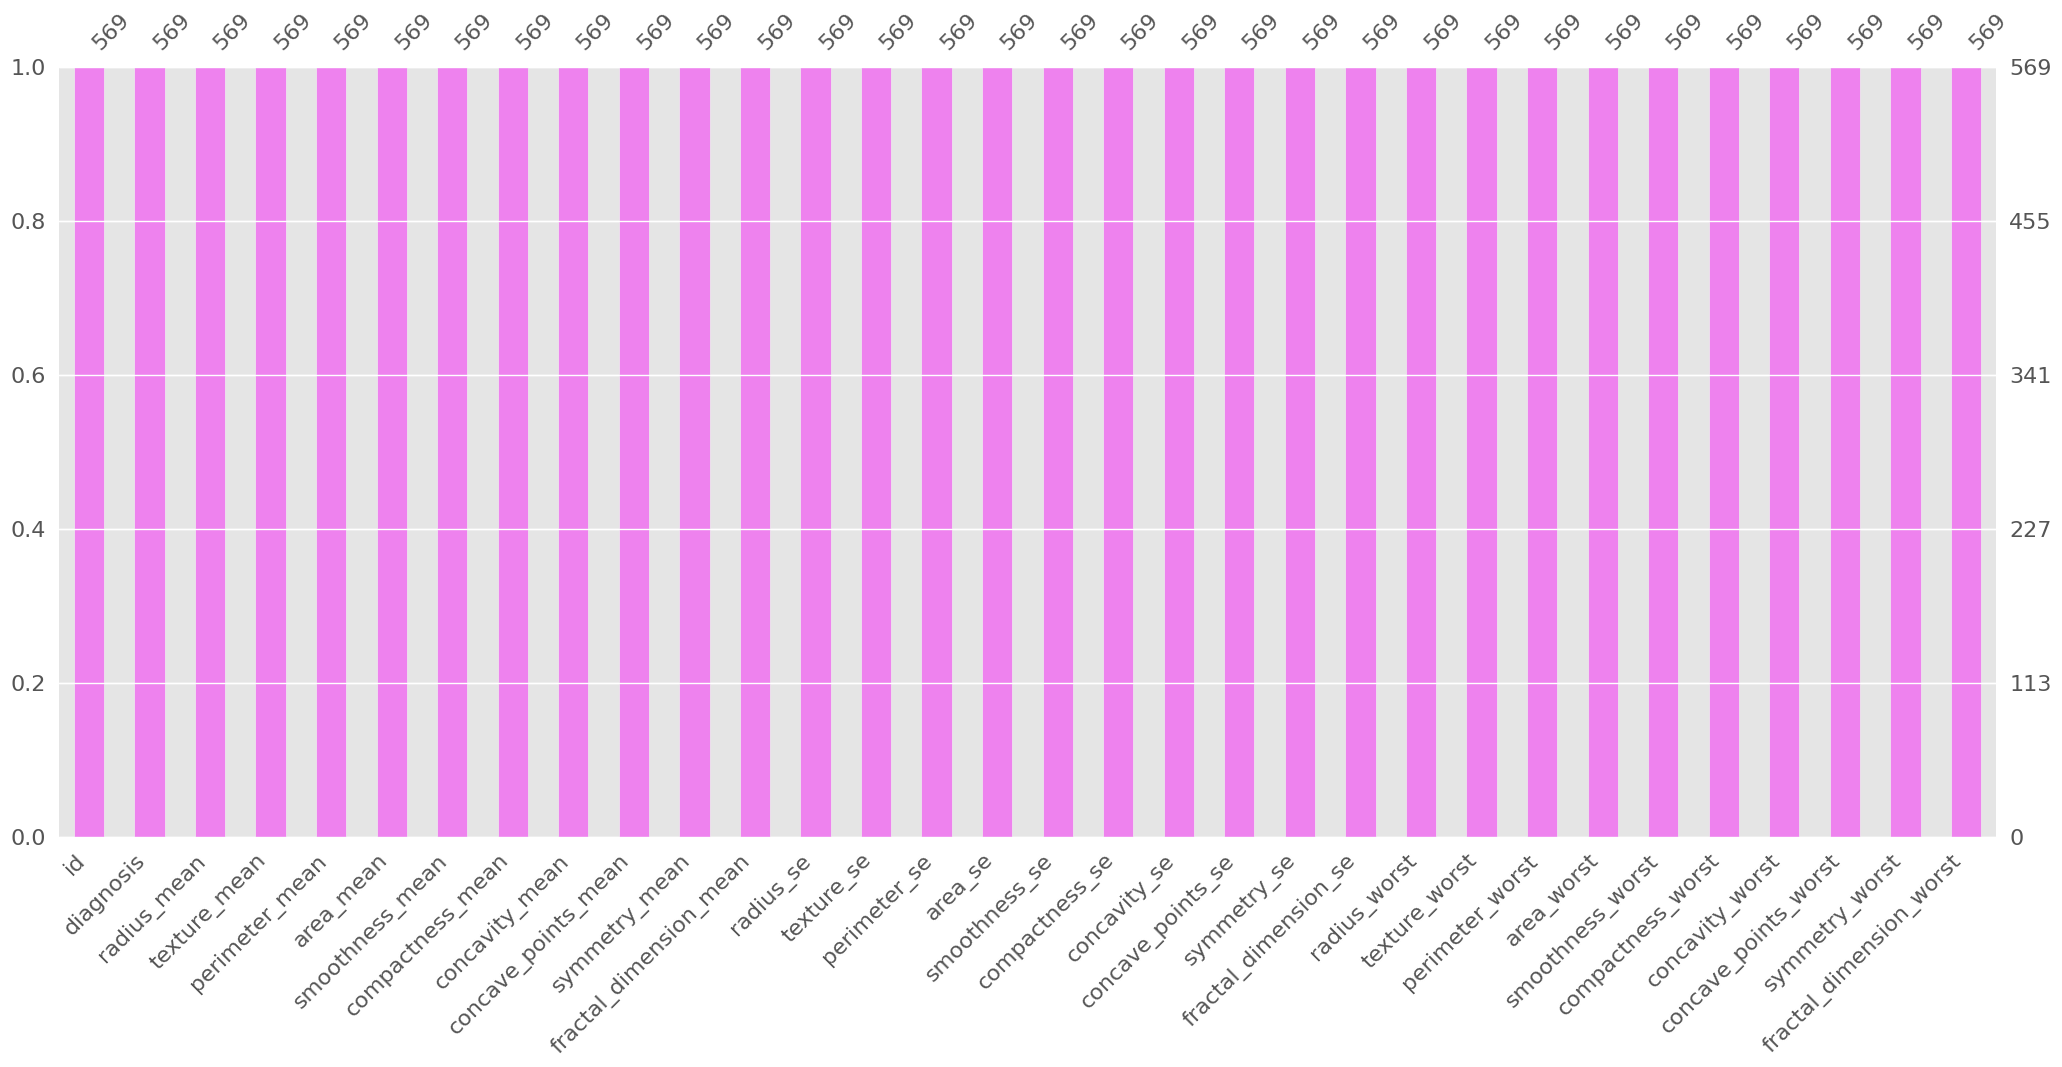

In [ ]:
# checking the missing values using bar chart
msno.bar(df, color= 'violet')
# graph shows that there are no missing values

In [ ]:
# replace M and B in diagnosis with 1 and 0 respectively
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

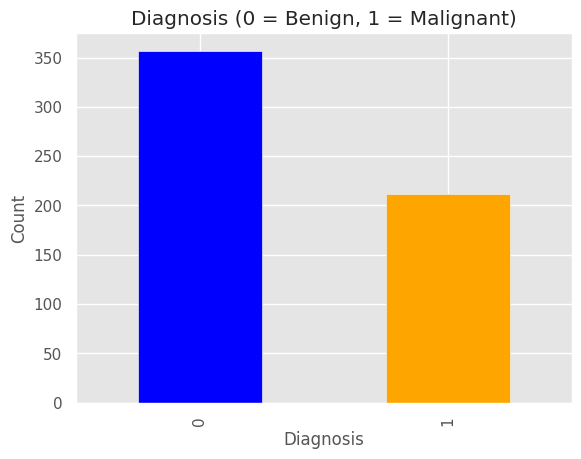

In [ ]:
# Count the number of instances for each class (0 = Benign, 1 = Malignant)
df['diagnosis'].value_counts().plot(kind='bar', color=['blue', 'orange'])

# Set plot title and labels
plt.title('Diagnosis (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.show()

# Step 7: Data Analysis

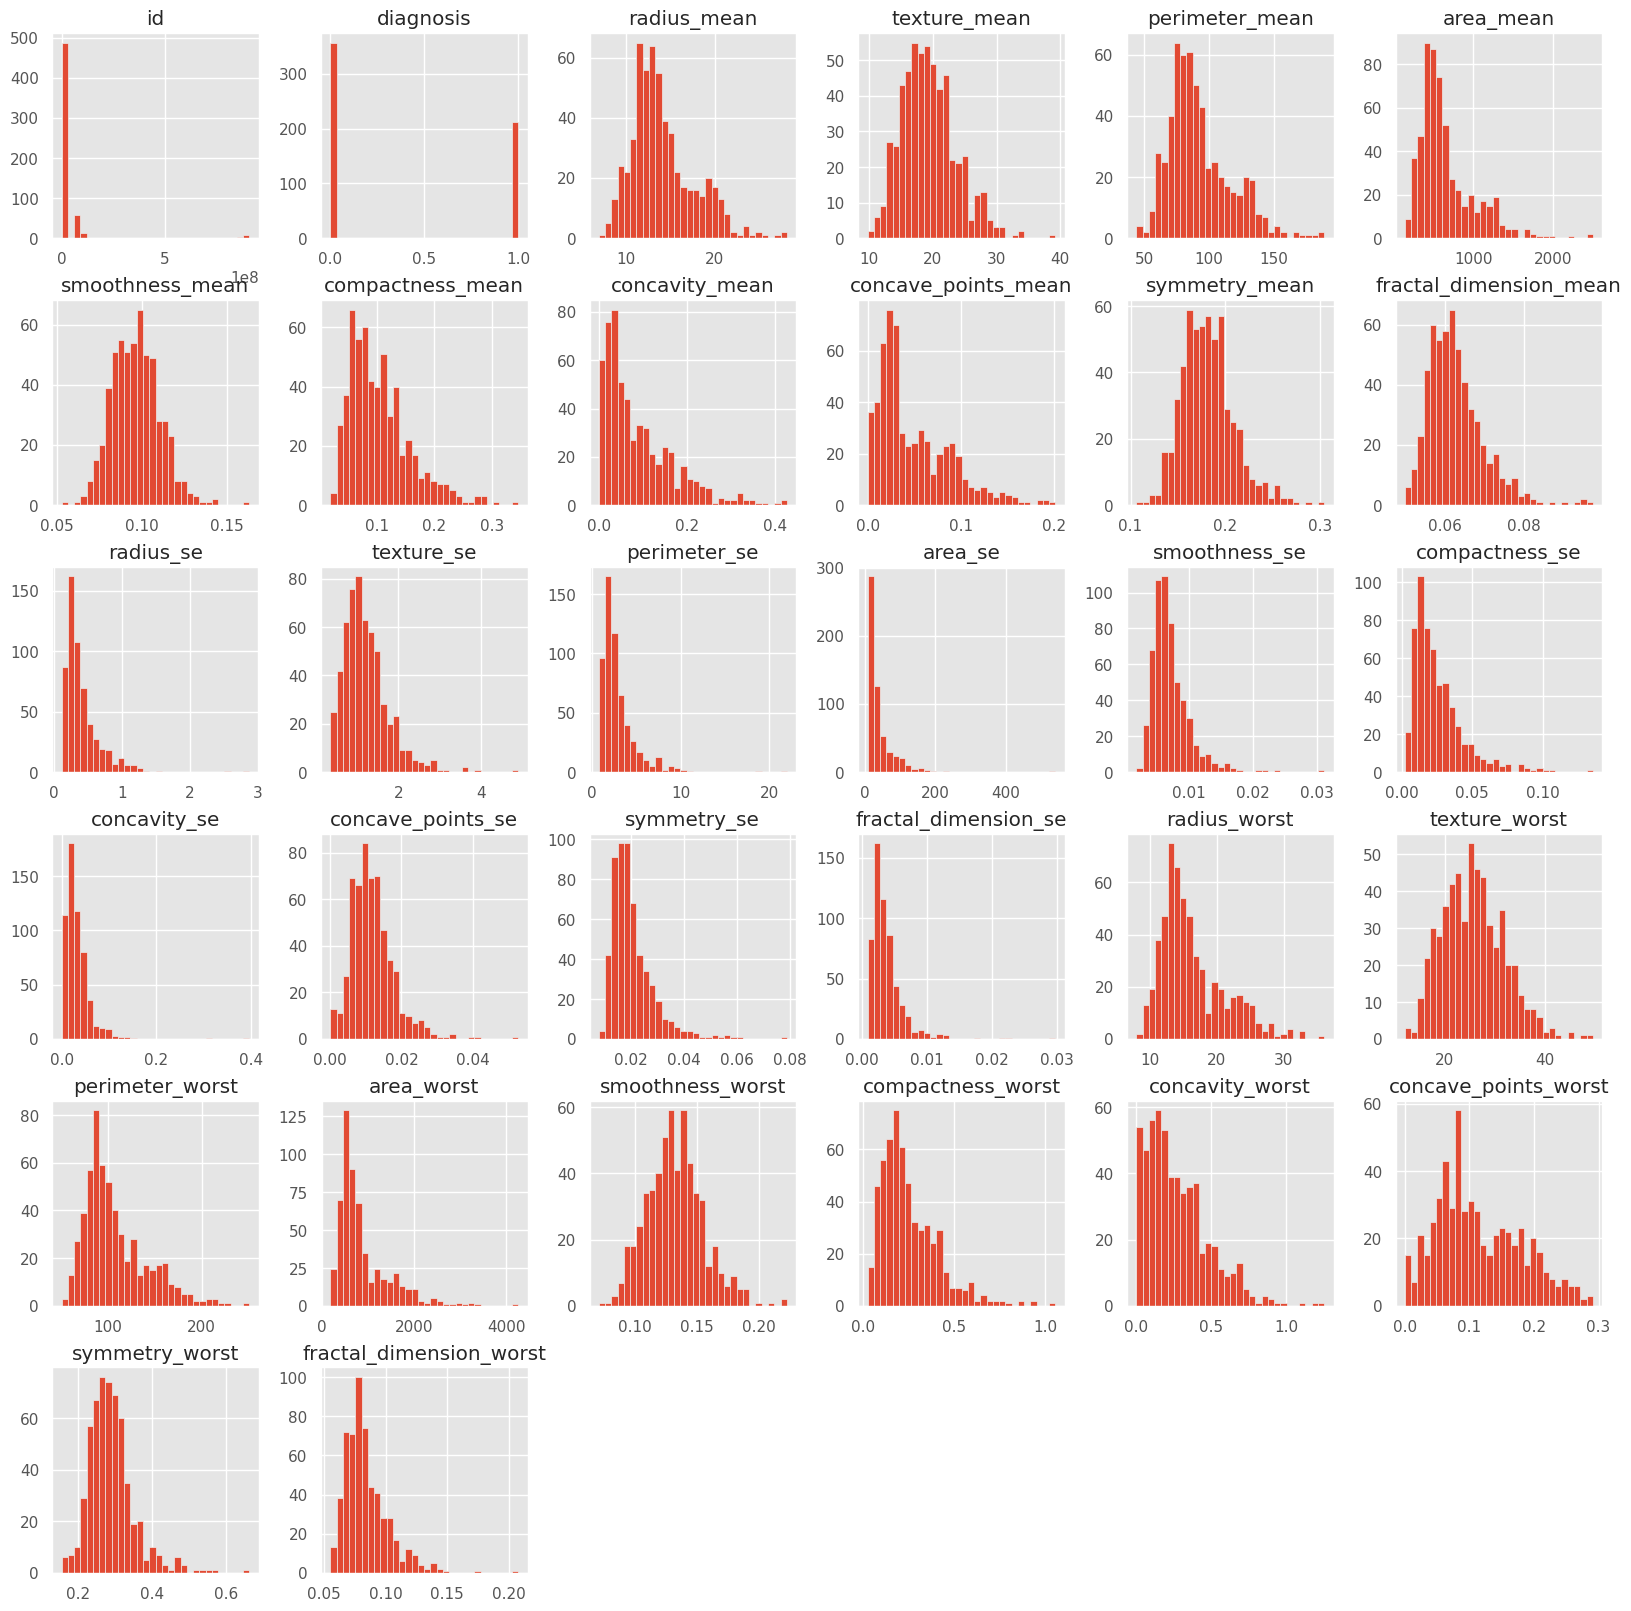

In [ ]:
# showing all the features of the dataset
df.hist(figsize=(20,20), bins =30)
plt.show()

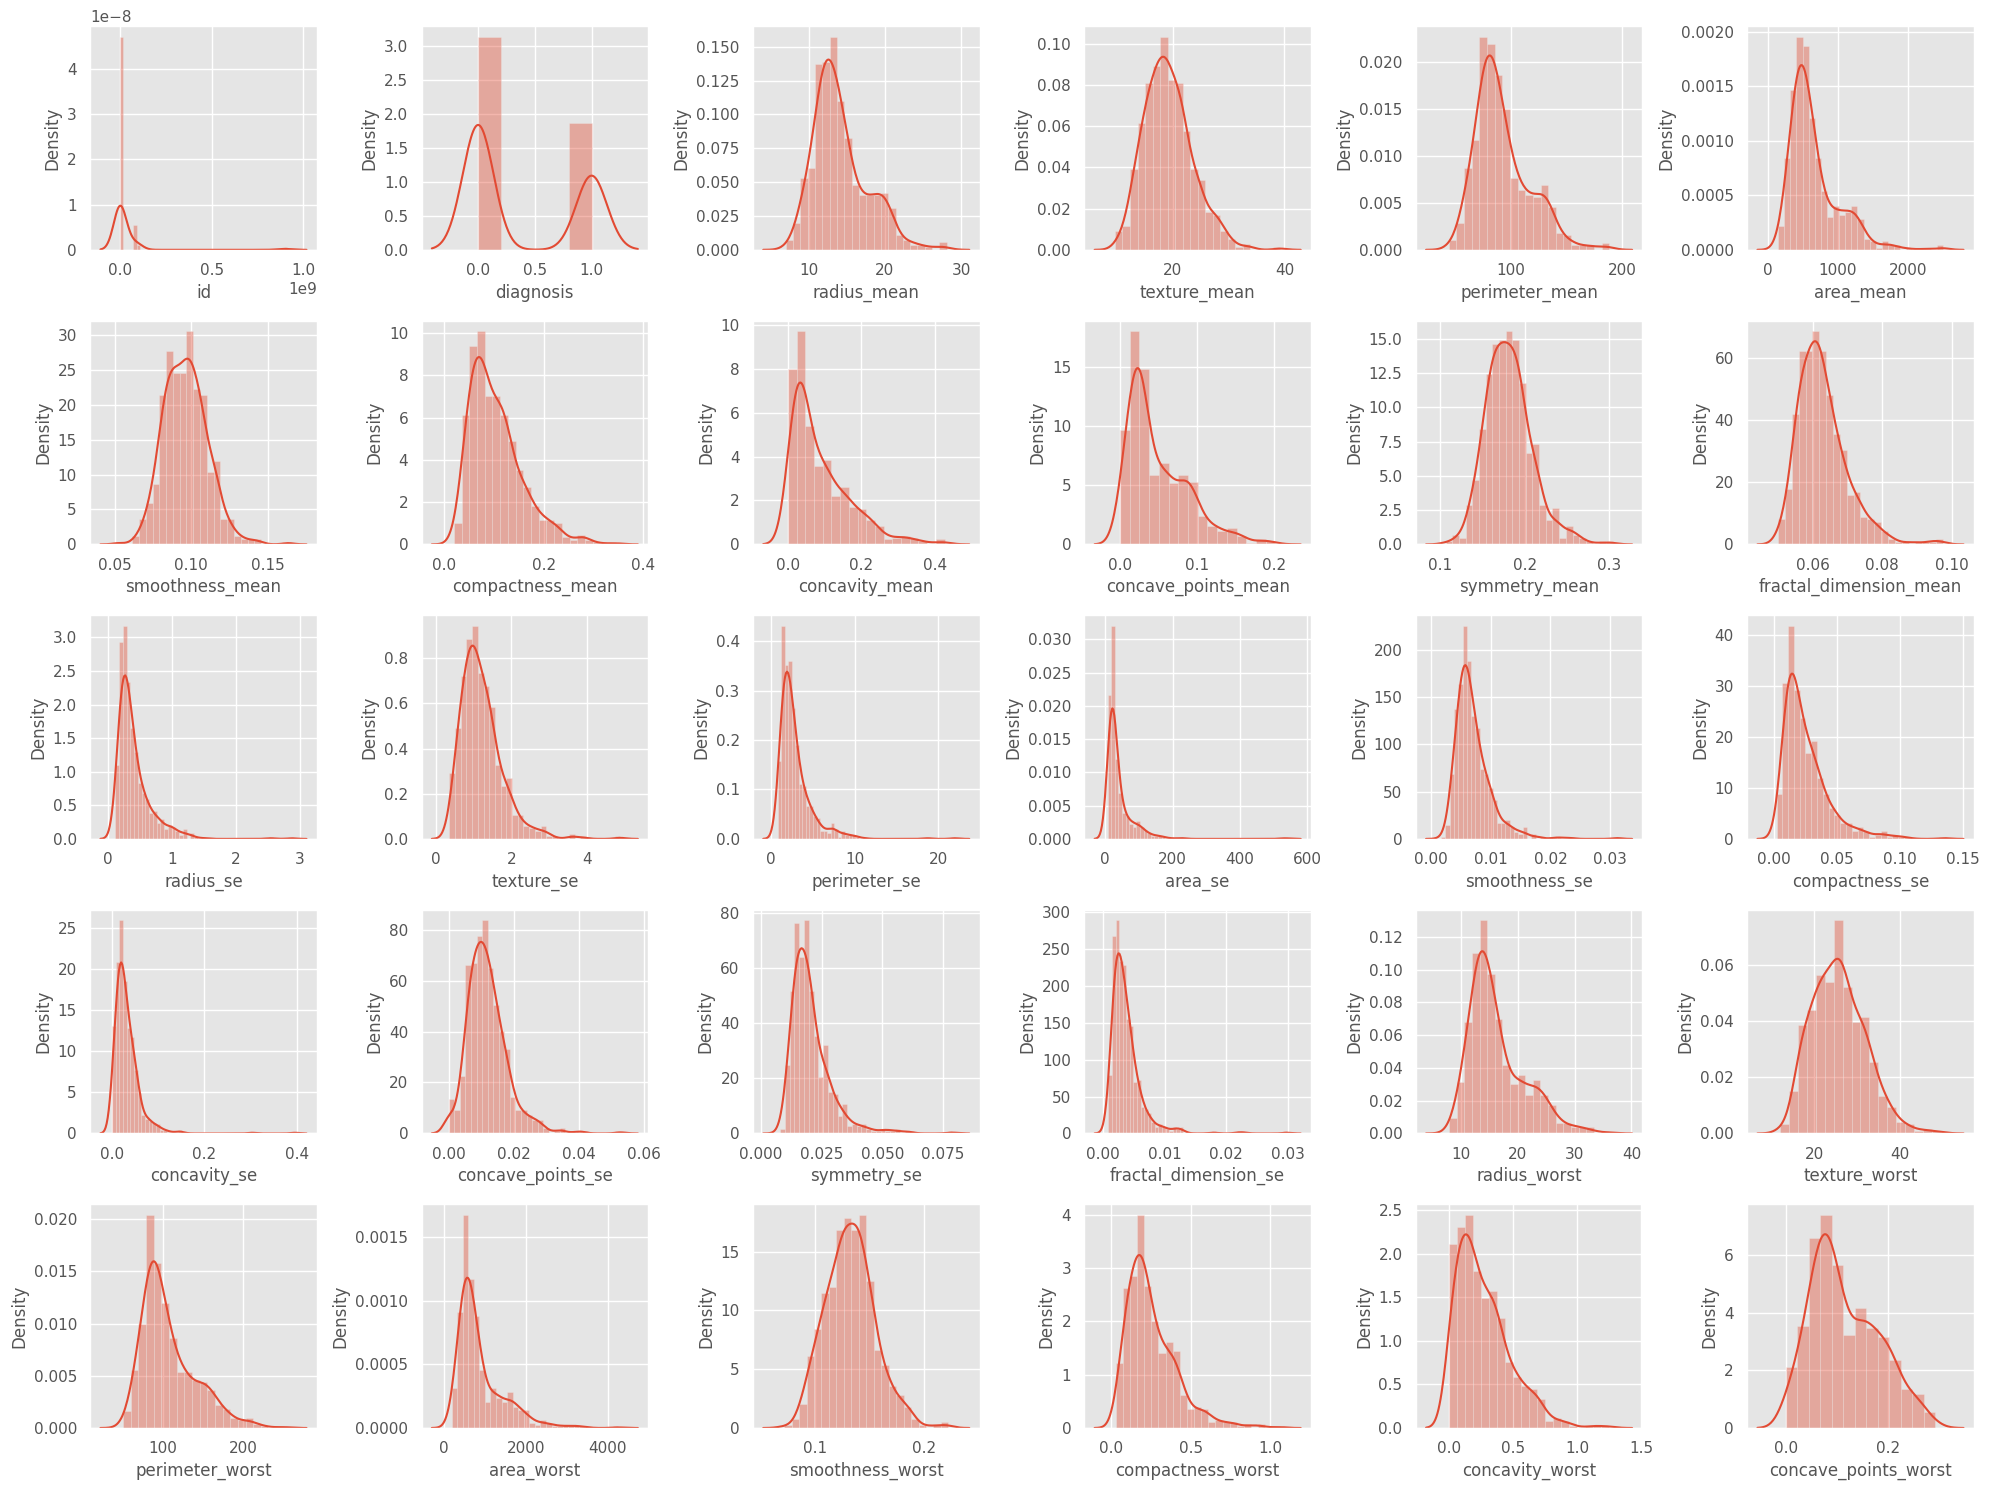

In [ ]:
# exploring the features using density graph
plt.figure(figsize=(20,15))
plotno =1
for col in df:
  if plotno <= 30:
    ax = plt.subplot(5,6,plotno)
    sns.distplot(df[col])
    plt.xlabel(col)
  plotno += 1

plt.tight_layout()
plt.show()

# Step 8: Checking for the feature correlation

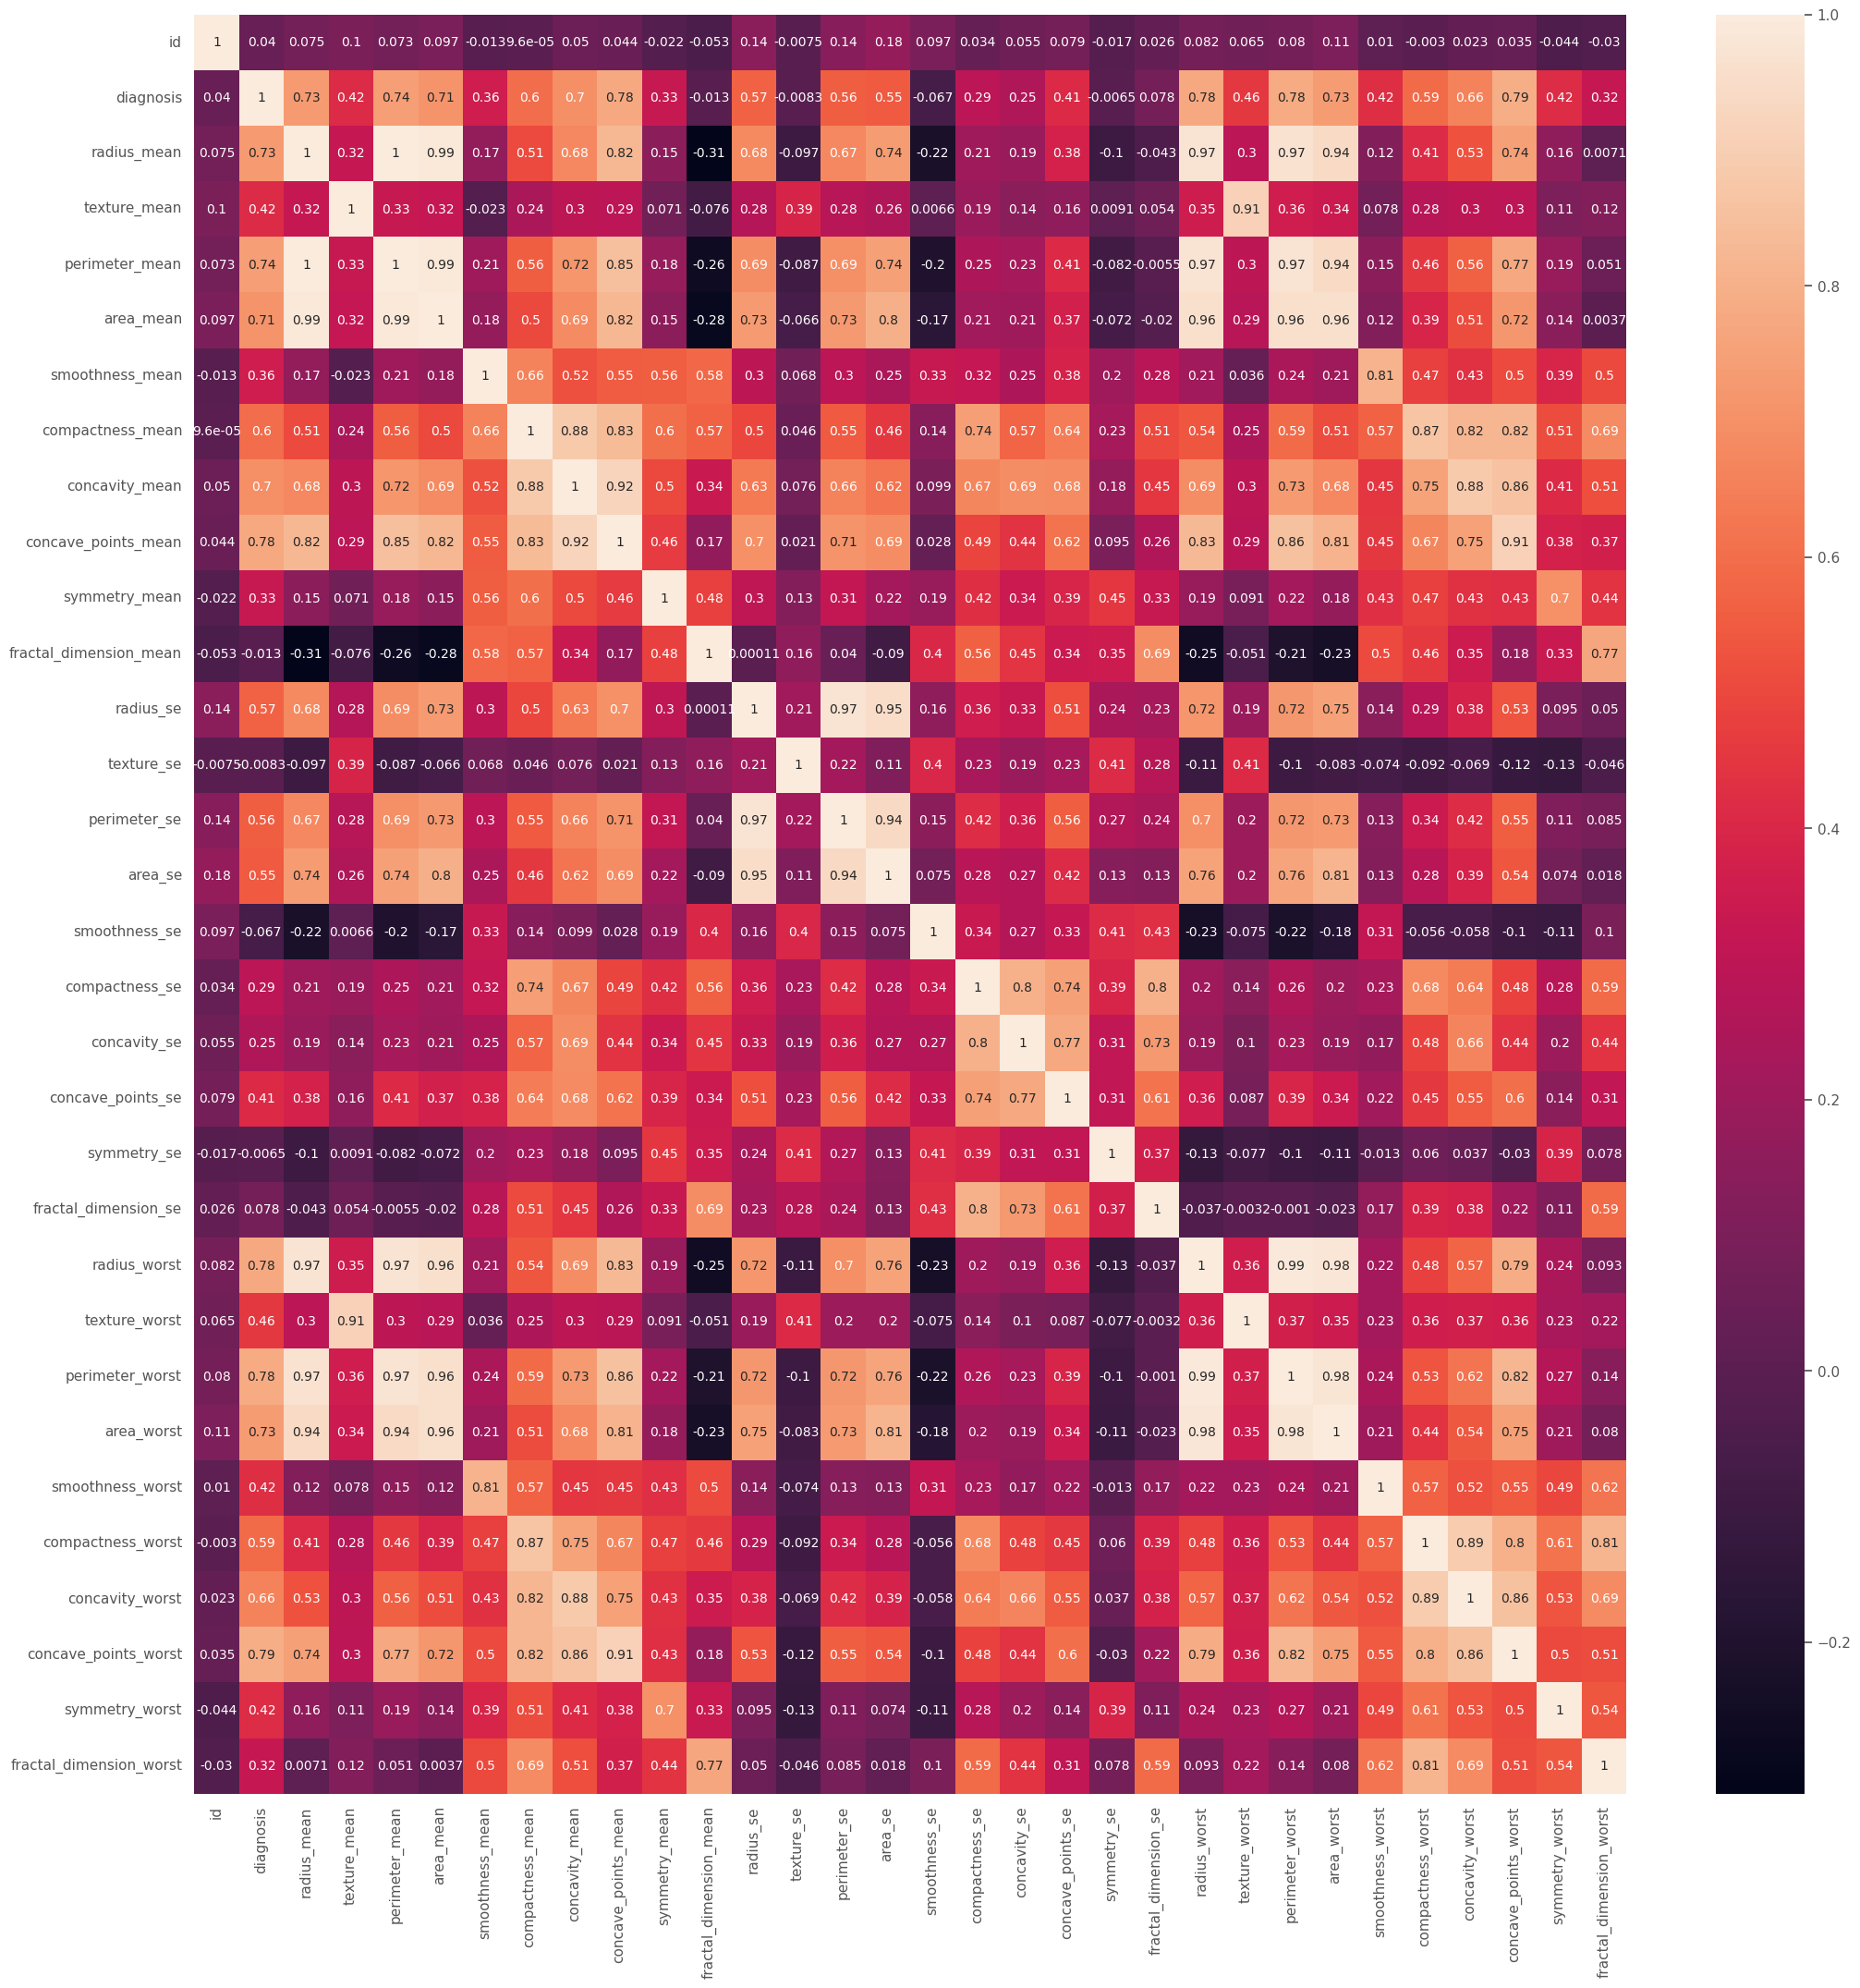

In [ ]:
# Generate a correlation matrix
corr = df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True)
plt.show()

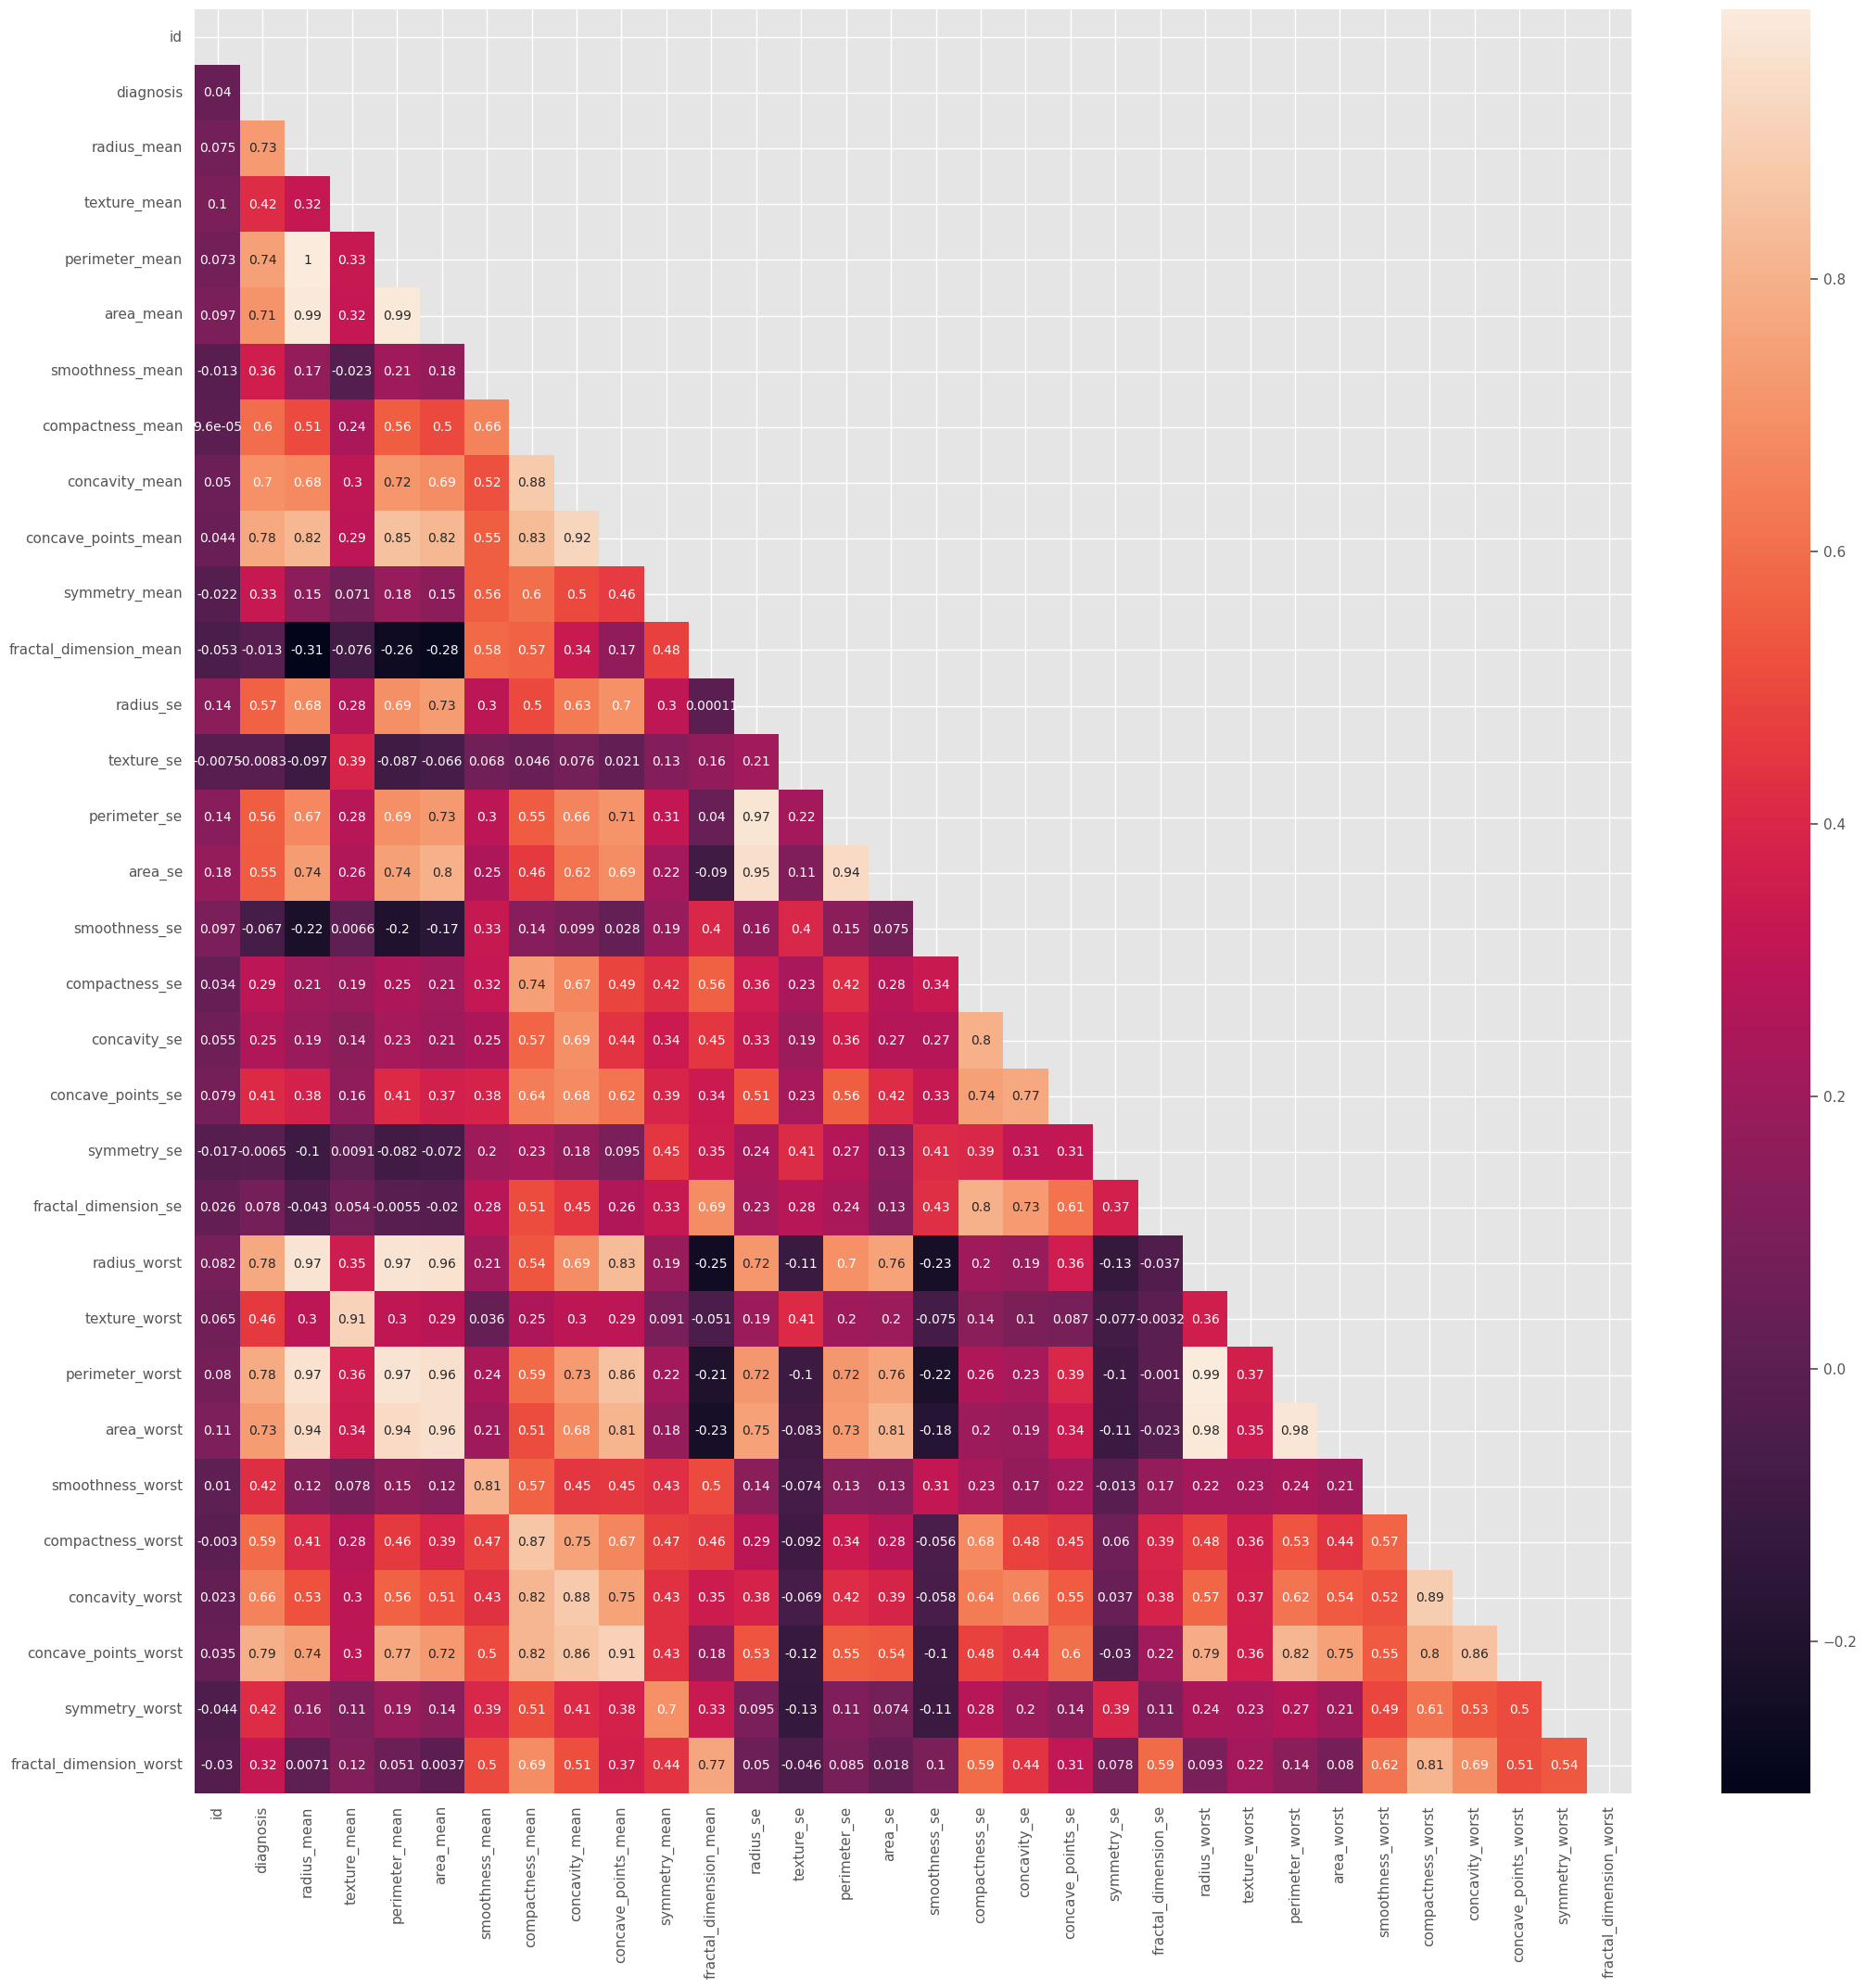

In [ ]:
# Generate a correlation matrix
corr = df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 25))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking)
plt.show()

#Step 9: Multicollinearity Checking and Removing

In [ ]:
# removing the id column
df.drop('id', axis =1, inplace=True)

In [ ]:
# removing the highly correlated values
corr_matrix = df.corr().abs()
masking = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(masking)

# if any value is greater than the 92 percent then drop it
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]
df = df.drop(to_drop, axis =1)

# again checking the rows and columns of the dataset
df.shape

(569, 23)

In [ ]:
# dropped features
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

**32 features are reduced to 23**

In [ ]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Step 10: Separating the independent features and dependent variable

In [ ]:
# dropping the target column, then we will left with all the independent variables
# that are stored in X
X = df.drop('diagnosis', axis =1)

# Separating the diagnosis column that is the target column as Y
Y = df['diagnosis']

# Step 11: Splitting the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing data
# 80% data is for training and 20 % data is for the testing of the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)


In [ ]:
X_train.head()

,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
338,17.53,0.10070,0.07326,0.01775,0.1890,0.06331,2.0150,16.85,0.007803,0.01449,...,0.02100,0.002778,26.84,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,21.98,0.08801,0.05743,0.01404,0.2016,0.05977,1.6210,20.20,0.006543,0.02148,...,0.01844,0.002690,32.04,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,14.86,0.09495,0.08501,0.04528,0.1735,0.05875,0.6372,21.83,0.003958,0.01246,...,0.01500,0.001621,19.58,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,17.84,0.10450,0.07057,0.02941,0.1900,0.06635,1.5110,24.44,0.005433,0.01179,...,0.02220,0.003408,20.92,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,22.44,0.08192,0.05200,0.01261,0.1544,0.05976,1.1390,18.04,0.005096,0.01205,...,0.01608,0.002399,31.99,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(455, 22)

# Step 12: Applying Machine Learning Algorithm

#### 1. K Nearest Neighbour (**KNN**)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Evaluation of KNN

In [ ]:
# evaluating the logistic regression algorithm

# predicting the diagnosis using X_test
y_predict = knn.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [ ]:
# predictiong report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: ', accuracy_score(Y_train, knn.predict(X_train)))
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print('Accuracy: ', knn_acc)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_predict))
print(classification_report(Y_test, y_predict ))


Accuracy:  0.967032967032967
Accuracy:  0.956140350877193
Confusion Matrix: 
[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### 2. Support Vector Machine (SVM)


In [ ]:
# Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability = True)
parameters = {
    'gamma': [0.0001, 0.001, 0.01 , 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
print('Best Score: ', grid_search.best_score_)
print('Best Parameters: ', grid_search.best_params_)
print('Best Estimator: ', grid_search.best_estimator_)
print('Best Index: ', grid_search.best_index_)

Best Score:  0.9802197802197803
Best Parameters:  {'C': 15, 'gamma': 0.01}
Best Estimator:  SVC(C=15, gamma=0.01, probability=True)
Best Index:  26


In [ ]:
# now using the best estimators for training
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, Y_train)

SVC(C=15, gamma=0.01, probability=True)

In [ ]:
y_predict = svc.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [ ]:
# predictiong report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: ', accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print('Accuracy: ', svc_acc)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_predict))
print(classification_report(Y_test, y_predict ))

Accuracy:  0.989010989010989
Accuracy:  0.9824561403508771
Confusion Matrix: 
[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### 3. Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'splitter': ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, Y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print('Best Score: ', grid_search_dt.best_score_)
print('Best Parameters: ', grid_search_dt.best_params_)
print('Best Estimator: ', grid_search_dt.best_estimator_)
print('Best Index: ', grid_search_dt.best_index_)

Best Score:  0.9648351648351647
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Best Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')
Best Index:  5383


In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4, min_samples_split=5, splitter='random')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [ ]:
# predictiong report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: ', accuracy_score(Y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))
print('Accuracy: ', dtc_acc)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_predict))
print(classification_report(Y_test, y_predict ))

Accuracy:  0.9538461538461539
Accuracy:  0.9122807017543859
Confusion Matrix: 
[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_predict = rfc.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
# predictiong report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: ', accuracy_score(Y_train, rfc.predict(X_train)))
rfc_acc = accuracy_score(Y_test, rfc.predict(X_test))
print('Accuracy: ', rfc_acc)
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, y_predict))
print(classification_report(Y_test, y_predict ))

Accuracy:  0.9956043956043956
Accuracy:  0.9736842105263158
Confusion Matrix: 
[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#Step 13: Summary of Models and Their Scores

In [ ]:
models = pd.DataFrame({
    'Model':['KNN', 'SVM', 'Decision Tree', 'Random Forest'],
    'Score': [100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4), 100*round(rfc_acc, 4)]
})
models.sort_values(by= 'Score', ascending = False)

,Model,Score
1,SVM,98.25
3,Random Forest,97.37
0,KNN,95.61
2,Decision Tree,91.23
